In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
X_train_df = pd.read_csv('data/train_features.csv')
X_test_df = pd.read_csv('data/test_features.csv')
y_train = pd.read_csv('data/train_target.csv')
y_test = pd.read_csv('data/test_target.csv')

In [3]:
import imblearn
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn import __version__ as imblearn_version
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, make_scorer,precision_recall_curve, precision_score, recall_score, roc_curve, precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Prediction on the test set

In [7]:
params_df = pd.read_csv('data/params.csv')
params_df.head()

,model,best_params,mean_test_score
0,LGBM-Imbalanced data,"{'LGBM__feature_fraction': 0.8, 'LGBM__learnin...",0.941389
1,LGBM-SMOTE,"{'LGBM__feature_fraction': 0.5, 'LGBM__learnin...",0.937203
2,LGBM-SMOTE Tomek Links,"{'LGBM__feature_fraction': 0.6, 'LGBM__learnin...",0.936798
3,XGB-Imbalanced data,"{'XGB__colsample_bytree': 0.8, 'XGB__learning_...",0.941410
4,XGB-SMOTE,"{'XGB__colsample_bytree': 0.8, 'XGB__learning_...",0.938168


In [9]:
import pandas as pd
import json
import ast


# Function to convert string to dictionary
def convert_to_dict(param_str):
    try:
        return json.loads(param_str)  # Attempt JSON conversion
    except json.JSONDecodeError:
        try:
            return ast.literal_eval(param_str)  # Attempt literal_eval conversion
        except (ValueError, SyntaxError) as e:
            print(f"Error decoding parameter string: {e}")
            return None  # Return None if both conversions fail

# Apply the conversion to the 'best_params' column
params_df['best_params'] = params_df['best_params'].apply(convert_to_dict)

# Check the conversion
print(params_df)
print(params_df['best_params'][0])  # This should now be a dictionary
print(type(params_df['best_params'][0]))  # This should print <class 'dict'>

                     model                                        best_params  \
0     LGBM-Imbalanced data  {'LGBM__feature_fraction': 0.8, 'LGBM__learnin...   
1               LGBM-SMOTE  {'LGBM__feature_fraction': 0.5, 'LGBM__learnin...   
2   LGBM-SMOTE Tomek Links  {'LGBM__feature_fraction': 0.6, 'LGBM__learnin...   
3      XGB-Imbalanced data  {'XGB__colsample_bytree': 0.8, 'XGB__learning_...   
4                XGB-SMOTE  {'XGB__colsample_bytree': 0.8, 'XGB__learning_...   
5    XGB-SMOTE Tomek Links  {'XGB__colsample_bytree': 0.8, 'XGB__learning_...   
6       LR-Imbalanced data  {'LR__C': 0.5, 'LR__penalty': 'l1', 'LR__solve...   
7                 LR-SMOTE  {'LR__C': 0.01, 'LR__penalty': 'l2', 'LR__solv...   
8     LR-SMOTE Tomek Links  {'LR__C': 0.5, 'LR__penalty': 'l2', 'LR__solve...   
9      SVM-Imbalanced data             {'SVM__C': 10.0, 'SVM__kernel': 'rbf'}   
10               SVM-SMOTE              {'SVM__C': 0.1, 'SVM__kernel': 'rbf'}   
11   SVM-SMOTE Tomek Links  

In [4]:
sm = SMOTE(k_neighbors=5, random_state=31)
X_train_smote, y_train_smote = sm.fit_resample(X_train_df,y_train)

In [5]:
sm_tm = SMOTETomek(random_state=31)
X_train_smote_tomek, y_train_smote_tomek = sm_tm.fit_resample(X_train_df,y_train)

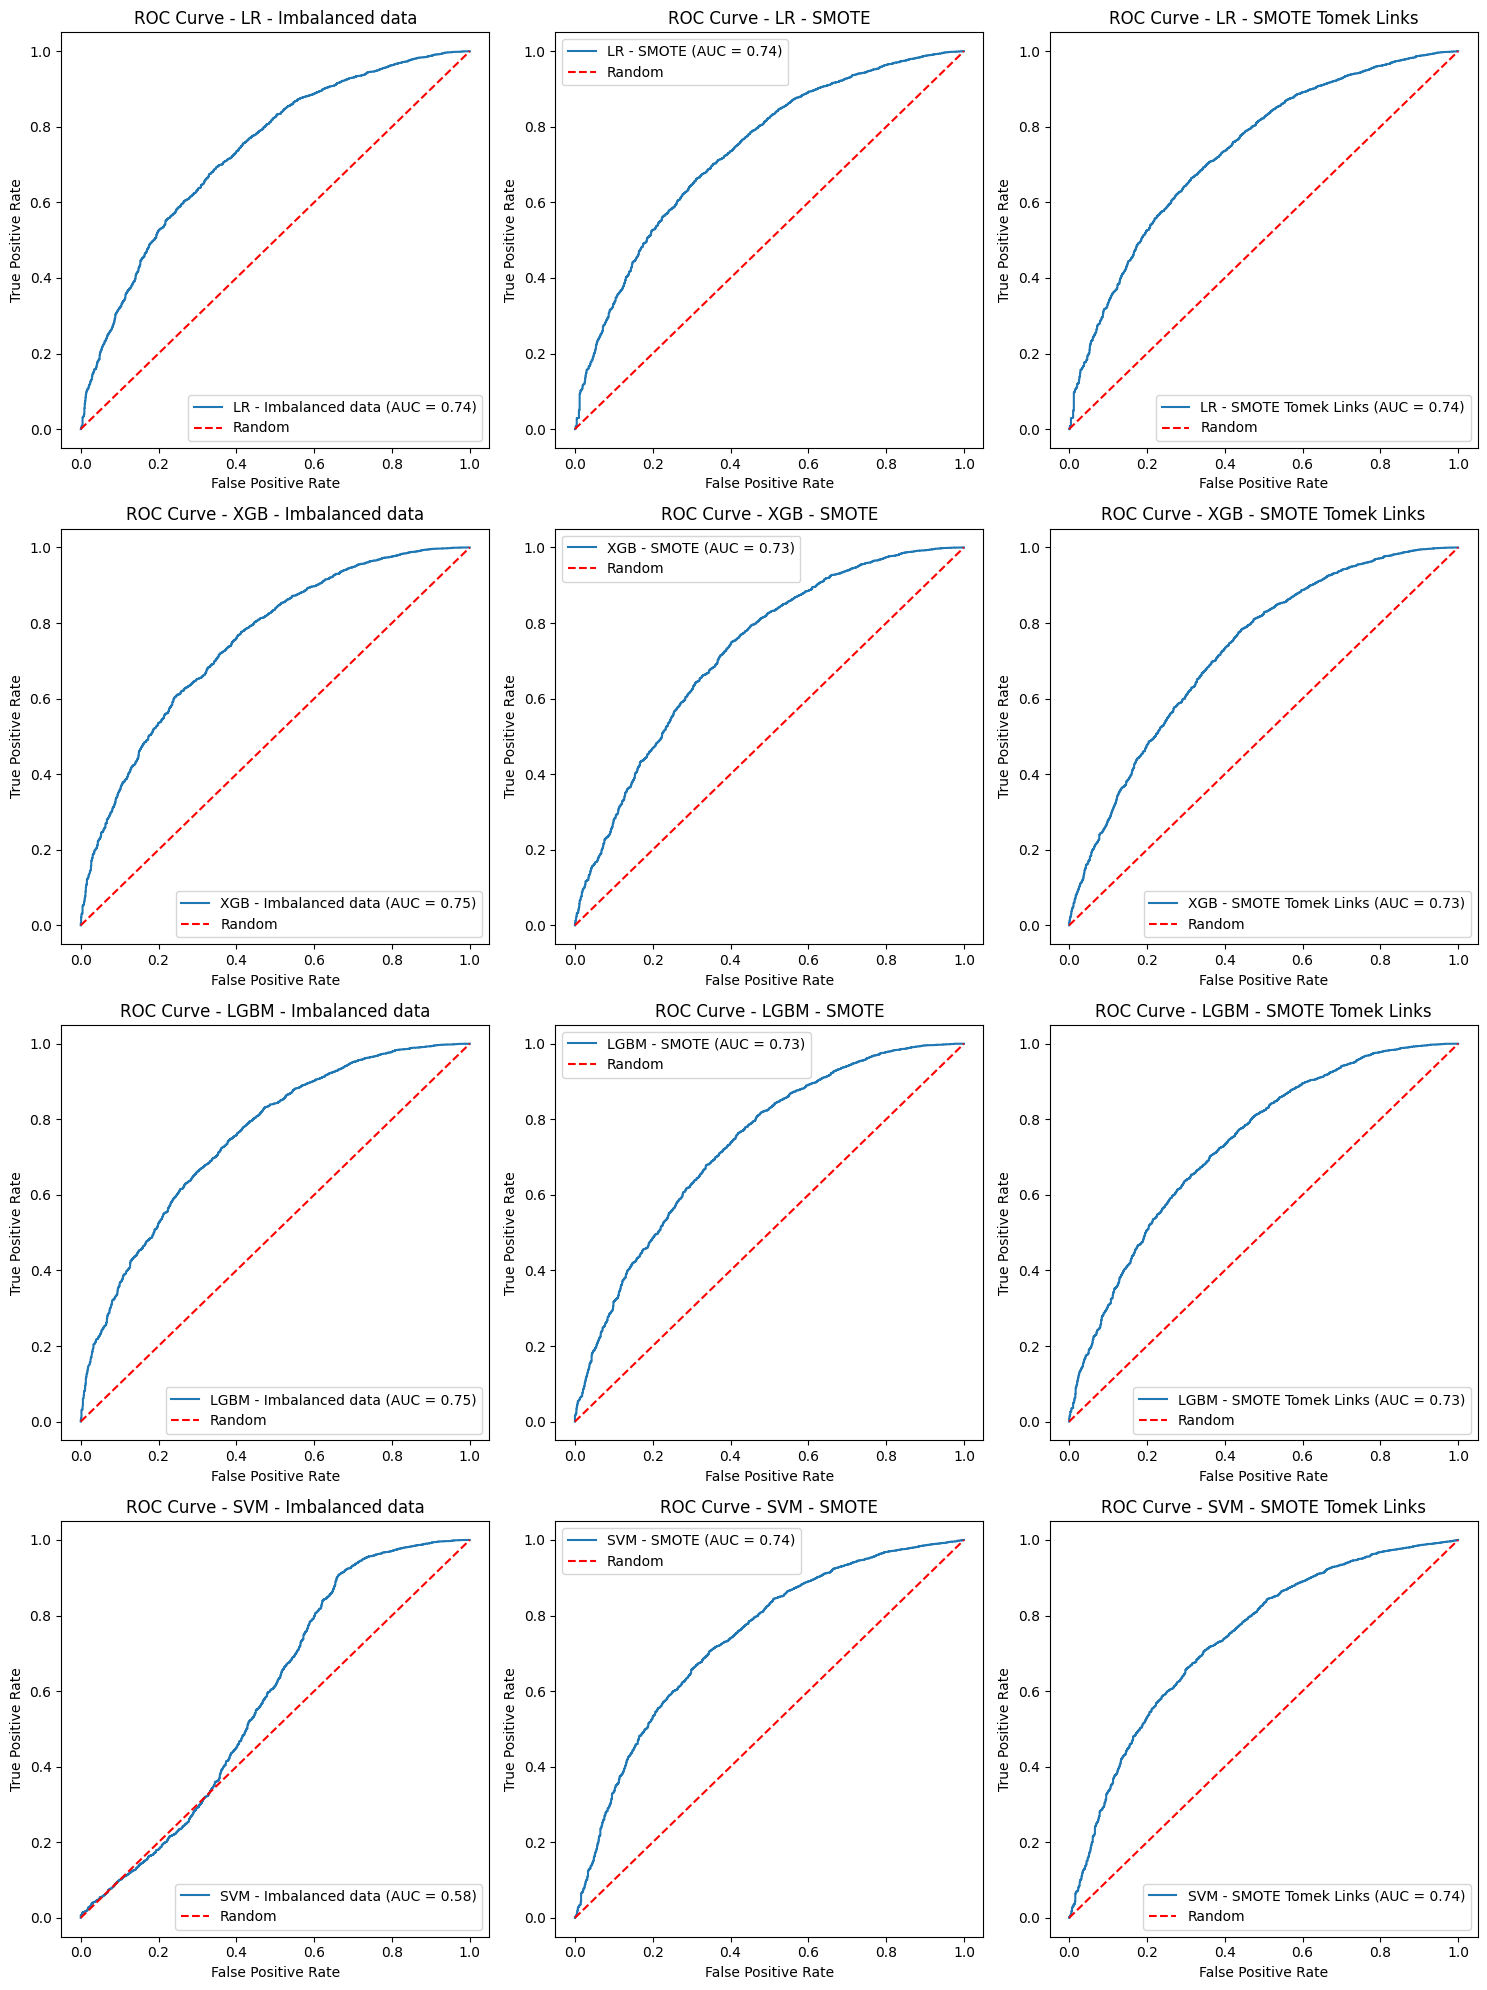

                                             Model  Accuracy  \
LR - Imbalanced data          LR - Imbalanced data   0.89463   
XGB - Imbalanced data        XGB - Imbalanced data  0.898081   
LGBM - Imbalanced data      LGBM - Imbalanced data  0.896153   
SVM - Imbalanced data        SVM - Imbalanced data  0.894731   
LR - SMOTE                              LR - SMOTE   0.68054   
XGB - SMOTE                            XGB - SMOTE  0.894325   
LGBM - SMOTE                          LGBM - SMOTE  0.891991   
SVM - SMOTE                            SVM - SMOTE   0.71678   
LR - SMOTE Tomek Links      LR - SMOTE Tomek Links  0.681758   
XGB - SMOTE Tomek Links    XGB - SMOTE Tomek Links  0.892904   
LGBM - SMOTE Tomek Links  LGBM - SMOTE Tomek Links    0.8926   
SVM - SMOTE Tomek Links    SVM - SMOTE Tomek Links  0.716882   

                         Precision (macro avg) Recall (macro avg)  \
LR - Imbalanced data                  0.790965           0.526884   
XGB - Imbalanced data        

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import json
import ast
import pandas as pd


# Example pipeline setup
pipe_lr = Pipeline([('LR', LogisticRegression(random_state=31))])
pipe_svm = Pipeline([('SVM', SVC(probability=True,random_state=31))])
pipe_xgb = Pipeline([('XGB', xgb.XGBClassifier(random_state=31))])
pipe_lgbm =Pipeline([('LGBM', LGBMClassifier(verbosity=-1,random_state=31))]) ## Need input

pipeline_list =[('LR',pipe_lr), 
                ('XGB', pipe_xgb), 
                ('LGBM',pipe_lgbm), 
                ('SVM',pipe_svm)]

# Function to fit, predict, and plot ROC curve for each case and classifier
def plot_roc_curve(ax, name, pipe, X_train, y_train, X_test, y_test, param):
    pipe.set_params(**param)
    pipe.fit(X_train, y_train)
    y_test_pred = pipe.predict(X_test)
    y_test_pred_proba = pipe.predict_proba(X_test)
    
    # Evaluation metrics
    auc_test = roc_auc_score(y_test, y_test_pred_proba[:, 1])
    clf_report = classification_report(y_test, y_test_pred, output_dict=True)
    class0_metrics = clf_report['0']
    class1_metrics = clf_report['1']
    macro_avg_metrics = clf_report['macro avg']
    accuracy_metric = clf_report['accuracy']
    balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

    # Store the results
    metrics_dict = {
        'Model': name,
        'Accuracy': accuracy_metric,
        'Precision (macro avg)': macro_avg_metrics['precision'],
        'Recall (macro avg)': macro_avg_metrics['recall'],
        'F1 (macro avg)': macro_avg_metrics['f1-score'],
        'Balanced accuracy': balanced_acc,
        'AUC': auc_test,
        'Precision (0)': class0_metrics['precision'],
        'Precision (1)': class1_metrics['precision'],
        'Recall (0)': class0_metrics['recall'],
        'Recall (1)': class1_metrics['recall'],
        'F1 (0)': class0_metrics['f1-score'],
        'F1 (1)': class1_metrics['f1-score'],
        'CM': confusion_matrix(y_test, y_test_pred),
    }
    results[name] = metrics_dict

    # Visualize ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba[:, 1])
    ax.plot(fpr, tpr, label=f'{name} (AUC = {auc_test:.2f})')
    ax.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend()

# Initialize the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 20))  # 4 rows (classifiers) and 3 columns (cases)
axs = axs.flatten()

# Create datasets for training
X_train_original, y_train_original = X_train_df, y_train  # Original data
X_train_smote, y_train_smote = X_train_smote, y_train_smote  # SMOTE resampled data
X_train_smote_tomek, y_train_smote_tomek = X_train_smote_tomek, y_train_smote_tomek  # SMOTE Tomek Link resampled data

#Test data was kept as is
X_test, y_test = X_test_df, y_test 

# Combined list of (case, pipeline) pairs
cases = ['Imbalanced data', 'SMOTE', 'SMOTE Tomek Links']
datasets = [(X_train_original, y_train_original), (X_train_smote, y_train_smote), (X_train_smote_tomek, y_train_smote_tomek)]

results = {}

for col_idx, (case, (X_train, y_train)) in enumerate(zip(cases, datasets)):
    for row_idx, (name, pipe) in enumerate(pipeline_list):
        full_model_name = f'{name}-{case}'
        param = params_df[params_df['model'] == full_model_name]['best_params'].iloc[0]

        if param is None:
            print(f"Skipping {full_model_name} due to parameter conversion error.")
            continue

        ax = axs[row_idx * 3 + col_idx]
        plot_roc_curve(ax, f'{name} - {case}', pipe, X_train, y_train, X_test, y_test, param)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


In [11]:
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1 (macro avg),Balanced accuracy,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1 (0),F1 (1),CM
LR - Imbalanced data,LR - Imbalanced data,0.89463,0.790965,0.526884,0.524596,0.526884,0.735442,0.685393,0.896538,0.056956,0.996811,0.105172,0.944019,"[[61, 1010], [28, 8752]]"
XGB - Imbalanced data,XGB - Imbalanced data,0.898081,0.80856,0.549315,0.563368,0.549315,0.752063,0.716129,0.90099,0.103641,0.994989,0.181077,0.945659,"[[111, 960], [44, 8736]]"
LGBM - Imbalanced data,LGBM - Imbalanced data,0.896153,0.770124,0.547823,0.560786,0.547823,0.753376,0.639535,0.900713,0.102708,0.992938,0.176991,0.94458,"[[110, 961], [62, 8718]]"
SVM - Imbalanced data,SVM - Imbalanced data,0.894731,0.839374,0.521202,0.513636,0.521202,0.584554,0.783333,0.895414,0.043884,0.998519,0.083112,0.94416,"[[47, 1024], [13, 8767]]"
LR - SMOTE,LR - SMOTE,0.68054,0.572678,0.67158,0.551087,0.67158,0.73764,0.202579,0.942776,0.660131,0.68303,0.31002,0.792154,"[[707, 364], [2783, 5997]]"
XGB - SMOTE,XGB - SMOTE,0.894325,0.726538,0.573032,0.596848,0.573032,0.726992,0.54717,0.905906,0.162465,0.983599,0.25054,0.943155,"[[174, 897], [144, 8636]]"
LGBM - SMOTE,LGBM - SMOTE,0.891991,0.708813,0.589758,0.616106,0.589758,0.734147,0.508159,0.909467,0.203548,0.975968,0.290667,0.941545,"[[218, 853], [211, 8569]]"
SVM - SMOTE,SVM - SMOTE,0.71678,0.578579,0.673055,0.571269,0.673055,0.738578,0.217363,0.939794,0.61718,0.728929,0.321498,0.821039,"[[661, 410], [2380, 6400]]"
LR - SMOTE Tomek Links,LR - SMOTE Tomek Links,0.681758,0.57339,0.673083,0.552249,0.673083,0.737713,0.203619,0.943162,0.661998,0.684169,0.311443,0.793056,"[[709, 362], [2773, 6007]]"
XGB - SMOTE Tomek Links,XGB - SMOTE Tomek Links,0.892904,0.715128,0.569775,0.591969,0.569775,0.725094,0.525,0.905257,0.156863,0.982688,0.241553,0.942384,"[[168, 903], [152, 8628]]"


In [12]:
results_df.to_csv('output/metrics_results_v2.csv',index=False)

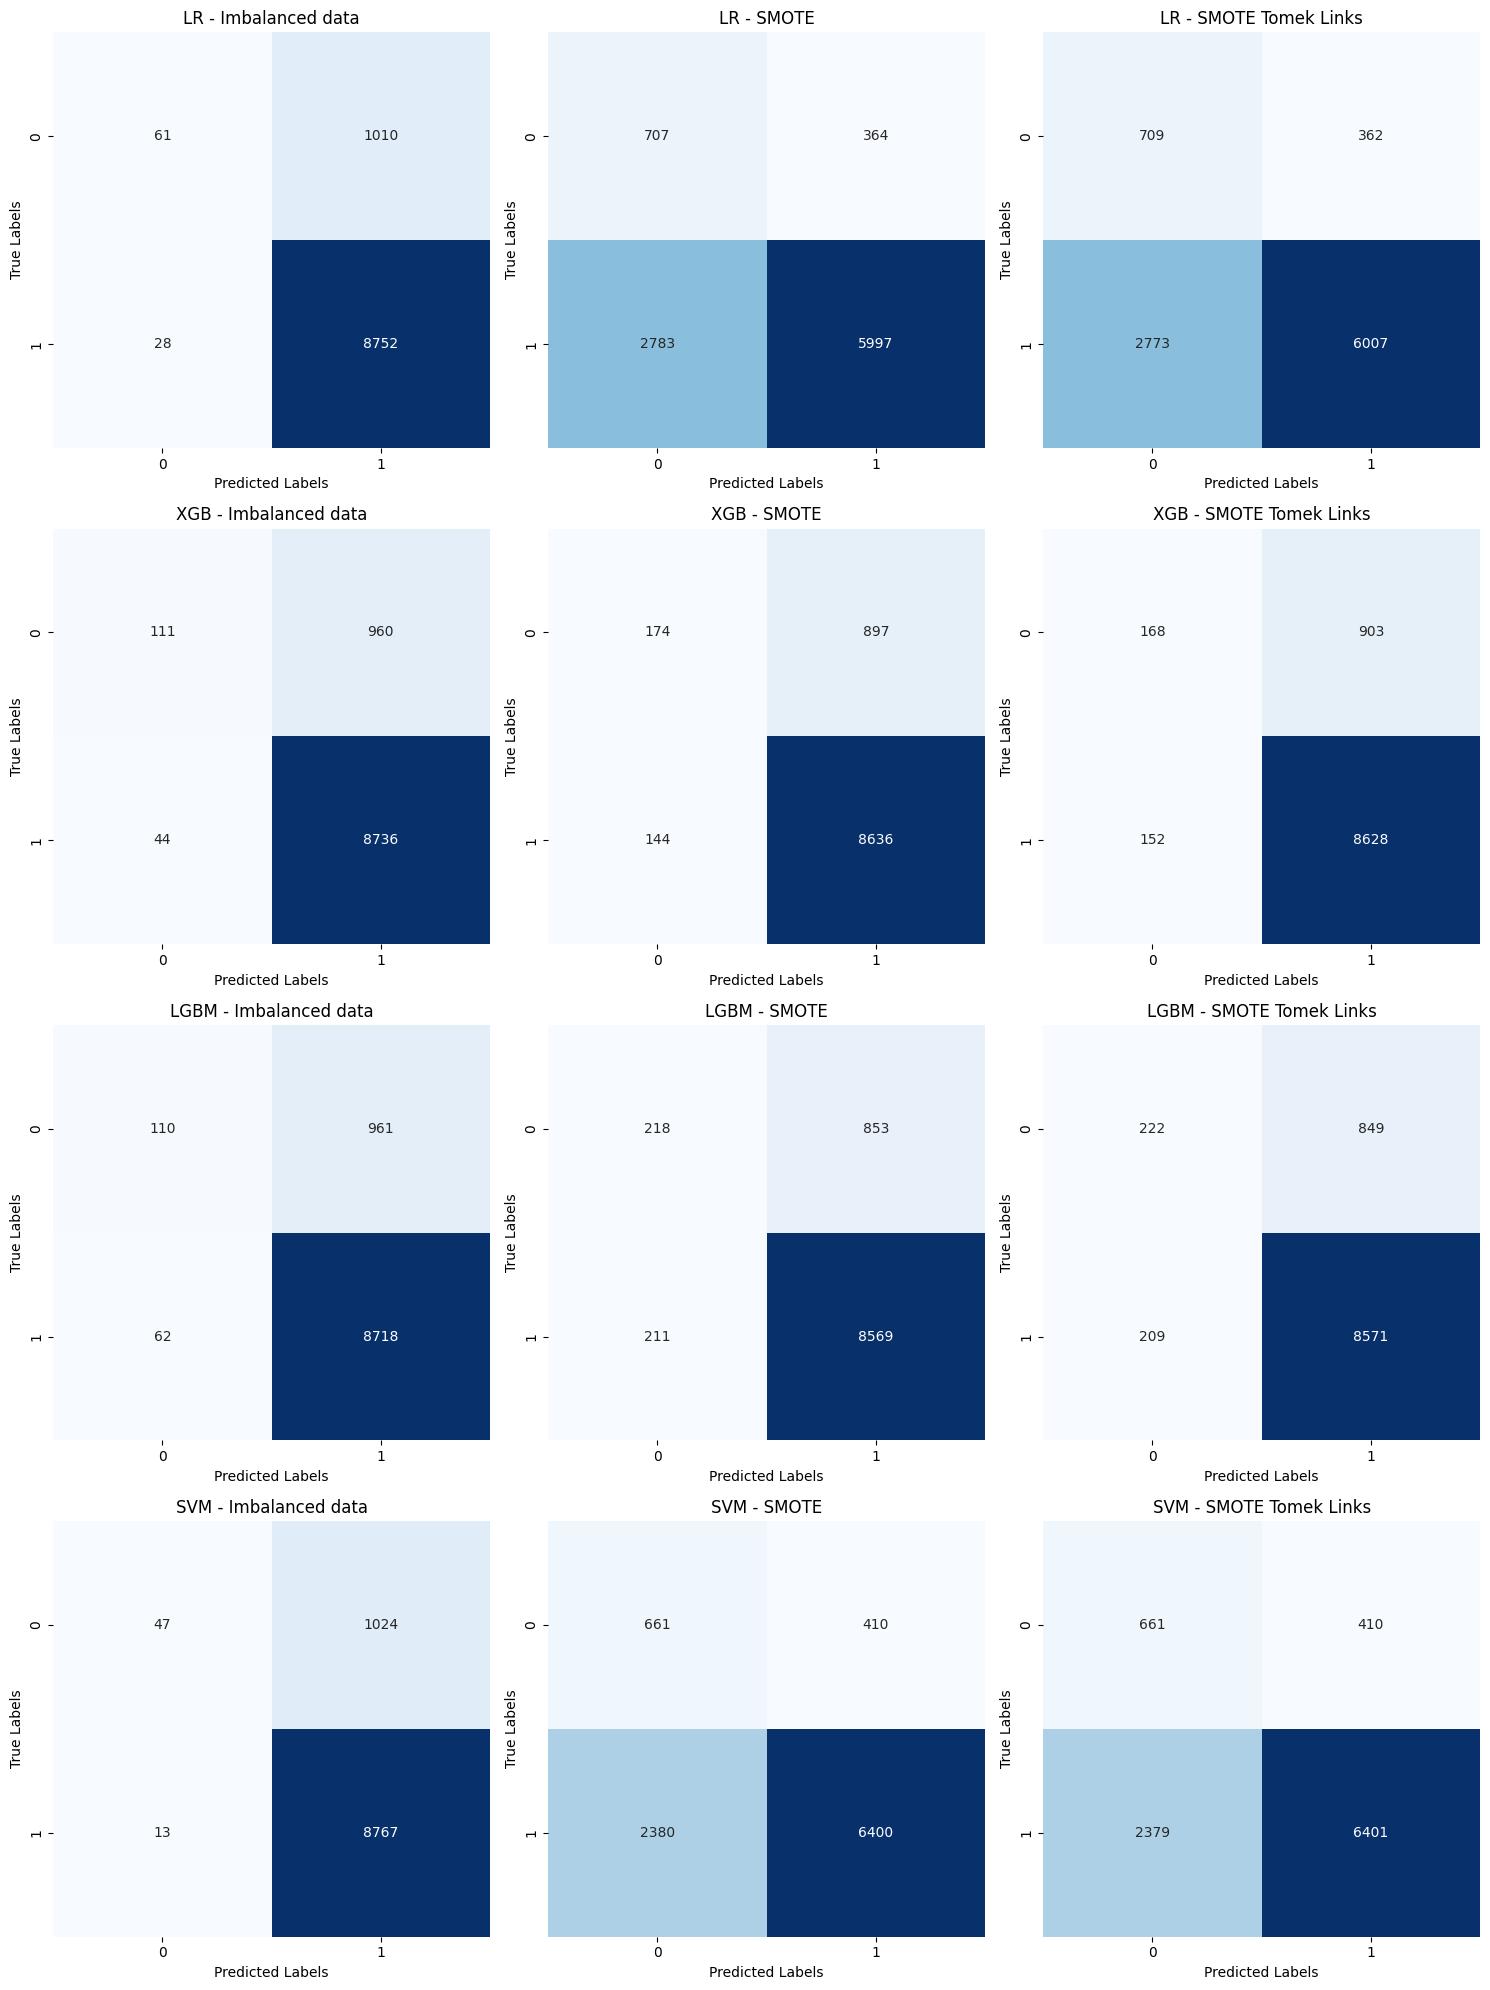

In [13]:
ordered_models = ['LR - Imbalanced data', 'LR - SMOTE', 'LR - SMOTE Tomek Links',
                  'XGB - Imbalanced data', 'XGB - SMOTE', 'XGB - SMOTE Tomek Links',
                  'LGBM - Imbalanced data','LGBM - SMOTE', 'LGBM - SMOTE Tomek Links',
                'SVM - Imbalanced data', 'SVM - SMOTE','SVM - SMOTE Tomek Links']
results_df_2 = results_df.loc[ordered_models]

def plot_confusion_matrix(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(title)

# Initialize the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 20))  # 4 rows and 3 columns
axs = axs.flatten()

# Iterate through the results and plot confusion matrices
for idx, (model_name, row) in enumerate(results_df_2.iterrows()):
    cm = row['CM']
    plot_confusion_matrix(cm, axs[idx], model_name)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()